     Month  Passengers
0  1949-01         112
1  1949-02         118
2  1949-03         132
3  1949-04         129
4  1949-05         121
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0172
Epoch 2/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0056
Epoch 3/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0061
Epoch 4/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0061
Epoch 5/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0037
Epoch 6/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0053
Epoch 7/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0064
Epoch 8/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0045
Epoch 9/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0036
Epoch 10/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0037
Epoch 11/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0038
Epoch 12/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0044
Epoch 13/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0028
Epoch 14/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0038
Epoch 15/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0027
Epoch 16/100
89/

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Train RMSE: 13.42
Test RMSE: 75.54


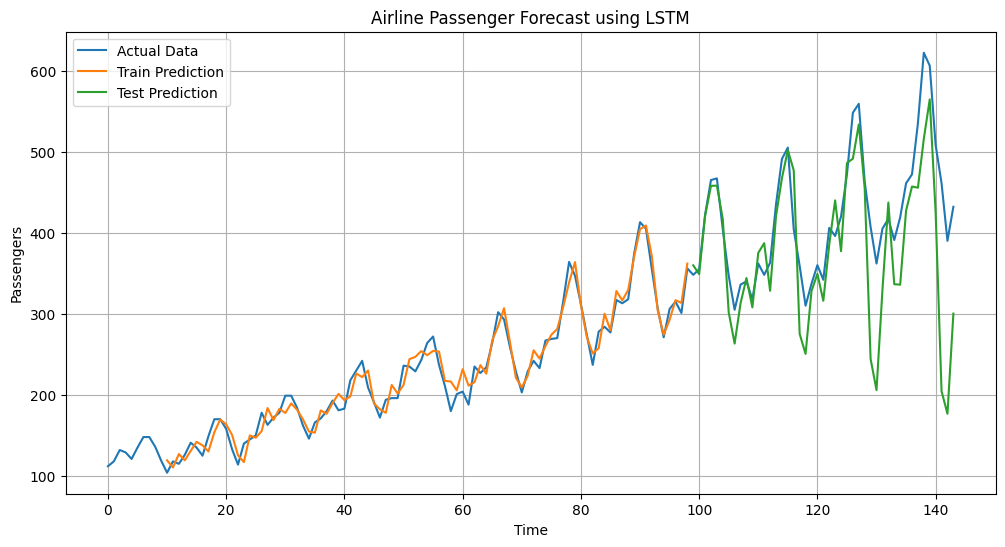

In [4]:
# Step 1: Install necessary packages
!pip install pandas numpy matplotlib scikit-learn tensorflow --quiet

# Step 2: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error
import math

# Step 3: Load Dataset
df = pd.read_csv('/content/airline-passengers.csv')
print(df.head())

# Step 4: Preprocess Data
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)
data = df['Passengers'].values
data = data.reshape(-1, 1)

# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

# Step 5: Create Dataset for Supervised Learning
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:(i + look_back), 0])
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 10  # you can change this
X, y = create_dataset(data, look_back)

# Reshape input to [samples, time steps, features] for LSTM
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Step 6: Split into train/test sets
train_size = int(len(X) * 0.67)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Step 7: Build the LSTM Model
model = Sequential()
model.add(LSTM(50, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Step 8: Train the Model
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1)

# Step 9: Predict
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform predictions
train_predict = scaler.inverse_transform(train_predict)
y_train_inv = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test_inv = scaler.inverse_transform([y_test])

# Step 10: Calculate RMSE
train_score = math.sqrt(mean_squared_error(y_train_inv[0], train_predict[:, 0]))
test_score = math.sqrt(mean_squared_error(y_test_inv[0], test_predict[:, 0]))
print(f'Train RMSE: {train_score:.2f}')
print(f'Test RMSE: {test_score:.2f}')

# Step 11: Visualize Results
train_plot = np.empty_like(data)
train_plot[:, :] = np.nan
train_plot[look_back:look_back + len(train_predict)] = train_predict

test_plot = np.empty_like(data)
test_plot[:, :] = np.nan
test_plot[look_back + len(train_predict):] = test_predict

# Plot baseline and predictions
plt.figure(figsize=(12,6))
plt.plot(scaler.inverse_transform(data), label="Actual Data")
plt.plot(train_plot, label="Train Prediction")
plt.plot(test_plot, label="Test Prediction")
plt.title("Airline Passenger Forecast using LSTM")
plt.xlabel("Time")
plt.ylabel("Passengers")
plt.legend()
plt.grid()
plt.show()